Lecture: AI I - Basics 

Previous:
[**Chapter 3.4: Visualisation with Seaborn**](../03_data/04_seaborn.ipynb)

---

# Chapter 3.5: Preprocessing with Pandas

- [Missing Values](#missing-values)
- [Data Types](#data-types)
- [Plotting with Pandas](#plotting-with-pandas)
- [Merging DataFrames](#merging-dataframes)
- [Working with Time Series Data](#working-with-time-series-data)
- [Exploratory Data Analysis](#exploratory-data-analysis)


Data cleaning and data preparation are huge topics.  
Some say that data scientists spend 80% of their time cleaning their data.  
The topics we’ll cover here are:

* Handling missing values  
* Removing duplicates  
* Structuring data  
* Removing outliers  
* Finding the right data types


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Missing Values

A sentinel value is used to represent missing values for numbers.  
A special bit pattern stands for "Not a Number" (NaN). You can think of this as the numerical equivalent of "None."  
In Python, `NaN` is available through the `NumPy` and `Pandas` packages. Since Pandas version 1.0, missing values are represented by a special object: `pd.NA`.

This may seem strange at first, but it begins to make sense when we think about the semantics of `NaN` or, more generally, `NA` as a placeholder for a value that is **N**ot **A**vailable.  
Because `NA` simply represents an unknown value, it would be incorrect to say that one unknown value equals another unknown value. Therefore, `NA` cannot truly be equal to anything.

To explicitly test for `NA`, we need a dedicated function provided by `pandas`.


In [3]:
pd.isna(np.nan)

True

In [4]:
pd.isna(pd.NA)

True

In [5]:
pd.isna(42)

False

### Handling Missing Values


In [8]:
ebola = pd.read_csv('data/preprocessing/ebola_country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [9]:
ebola['Cases_Guinea'].value_counts(dropna=False).head()

Cases_Guinea
NaN      29
86.0      3
112.0     2
495.0     2
390.0     2
Name: count, dtype: int64

### Dropping

The simplest way to handle missing data is to simply drop it.  
However, this can lead to significant data loss, depending on how the data is structured.


In [10]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [11]:
ebola.dropna(how='all')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling

Instead of dropping missing values, we can fill them so that the rest of the data remains usable.  
Keep in mind, however, that this always introduces artifacts.

We can fill with a constant value.


In [12]:
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


Or you can use more advanced strategies to compute the missing data, such as calculating a column mean.  
This can be replaced with any simple summary statistic.


In [13]:
ebola.mean(numeric_only=True)

Day                     144.778689
Cases_Guinea            911.064516
Cases_Liberia          2335.337349
Cases_SierraLeone      2427.367816
Cases_Nigeria            16.736842
Cases_Senegal             1.080000
Cases_UnitedStates        3.277778
Cases_Spain               1.000000
Cases_Mali                3.500000
Deaths_Guinea           563.239130
Deaths_Liberia         1101.209877
Deaths_SierraLeone      693.701149
Deaths_Nigeria            6.131579
Deaths_Senegal            0.000000
Deaths_UnitedStates       0.833333
Deaths_Spain              0.187500
Deaths_Mali               3.166667
dtype: float64

In [14]:
ebola.fillna(ebola.mean(numeric_only=True)).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667


Some more advanced techniques, such as the Expectation Maximization (EM) algorithm, exist but are not directly implemented in `pandas`.

When working with continuous data, it can be useful to fill missing values with previous or subsequent values.


In [15]:
ebola.fillna(method='ffill').head()

/tmp/ipykernel_933/206624273.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='ffill').head()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [16]:
ebola.fillna(method='bfill')

/tmp/ipykernel_933/544263679.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='bfill')


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Advanced Filling

Pandas also provides advanced methods for filling missing values.  
The [interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas-dataframe-interpolate) function offers several ways to interpolate missing values.


In [17]:
ebola['Cases_Guinea'].head()

0    2776.0
1    2775.0
2    2769.0
3       NaN
4    2730.0
Name: Cases_Guinea, dtype: float64

In [18]:
ebola['Cases_Guinea'].interpolate(method='quadratic').head()

0    2776.000000
1    2775.000000
2    2769.000000
3    2753.419091
4    2730.000000
Name: Cases_Guinea, dtype: float64

### Calculations with Missing Values

By default, `NumPy` is very strict when it comes to calculations involving `NA` values.  
Any operation that includes an `NA` will result in `NA`.  
This is correct in the sense that the final value of an operation such as `sum` cannot be known if even a single value is unknown.


In [19]:
np.nansum([1, 2, np.nan, 3])

np.float64(6.0)

From a practical standpoint, however, this is not very useful.  
Therefore, Pandas takes the approach of gracefully ignoring `NA`s.


In [20]:
ebola['Cases_Guinea'].sum()

np.float64(84729.0)

This behavior can be changed if desired.

In [21]:
ebola['Cases_Guinea'].sum(skipna=False)

np.float64(nan)

## Removing Duplicates

Duplicates can arise as part of unstructured data.  
It is important to correctly identify and remove them so they do not affect our statistics.


In [22]:
df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2, 2],
    'b': [10, 20, 30, 40, 50, 50],
})

df1

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50
5,2,50


Check whether a row is a duplicate.


In [23]:
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Drop the duplicate rows.


In [24]:
df1.drop_duplicates()

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50


Limit duplicate search to a subset of columns.


In [25]:
df1.duplicated(subset='a')

0    False
1     True
2     True
3    False
4     True
5     True
dtype: bool

In [26]:
df1.drop_duplicates(subset='a')

,a,b
0,1,10
3,2,40


## Data Preparation: Analyzing Data with Pandas


## Data Types

### Finding the Right Data Types

Data can be expressed on different scales. You need to ensure that you choose the level of measurement that makes sense both semantically and computationally.

A brief overview of the scales:

1. **Nominal Scale** <br/>
   Numbers represent only categories and nothing more. <br/>
   Example: gender, colors <br/>
   You can compute: absolute and relative frequencies, mode   

1. **Ordinal Scale** <br/>
   The order has meaning. <br/>
   Example: school grades, music charts, answers on a Likert scale <br/>
   You can additionally compute: cumulative frequencies, median, quantiles   

1. **Interval Scale** <br/>
   Equal intervals are assumed to have the same meaning. <br/>
   Example: temperature in Celsius, (intelligence) test scores <br/>
   You can additionally compute: mean, standard deviation   

1. **Ratio Scale** <br/>
   Ratios carry meaning and there is a defined zero point. <br/>
   Example: mass, height, time, speed <br/>
   You can compute: coefficient of variation $c = \frac{s}{\bar X}$, i.e., a normalized standard deviation


### Categorical Data

Using a [categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) dtype has several advantages:

* It keeps memory usage low  
* It makes the data usable for numerical modeling algorithms  
* It signals to libraries built on top of Pandas how the data should be handled  
* It makes the intent clear that only certain values are allowed in a column and how they relate to each other  

The following `Series` could be perfectly represented with categories instead of strings.


In [27]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'])
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: object

In [28]:
print(f'The string series is {s.nbytes} bytes big.')

The string series is 48 bytes big.


By specifying the `dtype` as `"category"`, the data is automatically converted to a categorical scale.


In [29]:
s = pd.Series(['a','b', 'b', 'a', 'c', 'c'], dtype='category')
s

0    a
1    b
2    b
3    a
4    c
5    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

Indeed, the `Series` becomes much smaller.  
This effect will be even more pronounced with larger `Series`.


In [30]:
print(f'The categorical series is {s.nbytes} bytes big.')

The categorical series is 30 bytes big.


Categorical data is stored under the hood using numerical codes that are mapped to the categories.


In [31]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [32]:
s.cat.codes

0    0
1    1
2    1
3    0
4    2
5    2
dtype: int8

Using `dtype='category'` creates unordered categories by default.


In [33]:
s.cat.ordered

False

The `cat` accessor allows you to modify, rename, and order categories.


In [34]:
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [35]:
s.cat.rename_categories(['x', 'y', 'z'])

0    x
1    y
2    y
3    x
4    z
5    z
dtype: category
Categories (3, object): ['x', 'y', 'z']

A categorical Series can also be created from `pd.Categorical`.  
This allows you to explicitly define the categories and their order.


In [36]:
pd.Categorical(['a', 'b', 'c', 'a'], categories=['b', 'c'],ordered=False)

[NaN, 'b', 'c', NaN]
Categories (2, object): ['b', 'c']

The `Categorical` object can then be passed to the `Series` constructor to create a proper `Series`.


In [ ]:
cat_series = pd.Series(
    pd.Categorical(
        ['a', 'b', 'c', 'a'], 
        categories=['b', 'c', 'a'],
        ordered=False
    )
)
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

### Ordered Categories

What does it mean to have ordered categories?


In [ ]:
cat_series2 = pd.Series(
    pd.Categorical(
        ['c', 'a', 'c', 'b'], 
        categories=['b', 'c', 'a'],
        ordered=False
    )
)
cat_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [39]:
cat_series == cat_series2

0    False
1    False
2     True
3    False
dtype: bool

In [41]:
try:
    cat_series > cat_series2
except TypeError as e:
    print("TypeError", e)

TypeError Unordered Categoricals can only compare equality or not


In [42]:
cat_series

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [43]:
cat_series.mode()

0    a
dtype: category
Categories (3, object): ['b', 'c', 'a']

In [45]:
try:
    cat_series.max()
except TypeError as e:
    print("TypeError", e)

TypeError Categorical is not ordered for operation max
you can use .as_ordered() to change the Categorical to an ordered one



This semantics is lost when you extract the atomic values.  
Only the `Series` is categorical, not the individual entries.


In [46]:
cat_series.iloc[0], type(cat_series.iloc[0])

('a', str)

In [47]:
cat_series.iloc[0] < cat_series.iloc[1]

True

Now the same for an **ordered** categorical `Series`.


In [ ]:
cat_ordered_series = pd.Series(
    pd.Categorical(
        ['a', 'b', 'c', 'a'], 
        categories=['b', 'c', 'a', 'd'],
        ordered=True
    )
)
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [ ]:
cat_ordered_series2 = pd.Series(
    pd.Categorical(
        ['c', 'a', 'c', 'b'], 
        categories=['b', 'c', 'a', 'd'],
        ordered=True
    )
)
cat_ordered_series2

0    c
1    a
2    c
3    b
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [50]:
cat_ordered_series > cat_ordered_series2

0     True
1    False
2    False
3     True
dtype: bool

In [51]:
cat_ordered_series.max()

'a'

In [52]:
cat_ordered_series == cat_ordered_series2

0    False
1    False
2     True
3    False
dtype: bool

The median does not work on categorical Series, but it can be calculated using the codes.


In [53]:
cat_ordered_series

0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): ['b' < 'c' < 'a' < 'd']

In [55]:
try:
    cat_ordered_series.median()
except TypeError as e:
    print("TypeError", e)

TypeError 'Categorical' with dtype category does not support reduction 'median'


In [56]:
cat_ordered_series.cat.codes.median()

np.float64(1.5)

If you want to convert existing data into a categorical type and specify the categories and their order, you can create your own categorical data type with `pd.CategoricalDtype`.  
It works the same way as `pd.Categorical`, except that you don’t pass the data.  
The newly created data type can then be used in an `astype()` cast.


In [57]:
series = pd.Series(['a', 'b', 'c', 'a'])
series

0    a
1    b
2    c
3    a
dtype: object

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['b', 'c', 'a'], ordered=True)
cat_type

CategoricalDtype(categories=['b', 'c', 'a'], ordered=True, categories_dtype=object)

In [59]:
series.astype(cat_type)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['b' < 'c' < 'a']

Let’s now take a look at a real-world dataset and some discretization techniques.  
The Titanic dataset contains features about passengers from the tragic Titanic voyage.  
A common introductory machine learning exercise is predicting passenger survival based on these features (see https://www.kaggle.com/c/titanic/data).


In [61]:
titanic = pd.read_csv('data/preprocessing/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We include all columns in the description because "object" columns are described differently than "numeric" columns and are excluded from the description by default.


In [63]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Let’s expand the embarkation port to its full name to make things a bit more readable.  
For this, we’ll use a simple merge operation (more on this later).


In [80]:
embarked_map = pd.DataFrame({
    'Embarked': ['C', 'Q', 'S'],
    'EmbarkedLong': ['Cherbourg', 'Queenstown', 'Southampton']
})
embarked_map

,Embarked,EmbarkedLong
0,C,Cherbourg
1,Q,Queenstown
2,S,Southampton


In [65]:
titanic = titanic.merge(embarked_map).sort_values(by='PassengerId')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkedLong
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Southampton


In [66]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
EmbarkedLong     object
dtype: object

Since the "EmbarkedLong" column has only three distinct values, it makes sense to represent it with categories.


In [67]:
titanic['EmbarkedLong'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [68]:
titanic['EmbarkedLong'] = titanic['EmbarkedLong'].astype('category')
titanic['EmbarkedLong'].head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: EmbarkedLong, dtype: category
Categories (3, object): ['Cherbourg', 'Queenstown', 'Southampton']

In [69]:
titanic.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
EmbarkedLong    category
dtype: object

The description for a categorical column is the same as for an `object` column.


In [70]:
titanic['EmbarkedLong'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: EmbarkedLong, dtype: object

## Discretizing Continuous Values (Tiling)

Sometimes it makes sense to convert numerical data into categorical data.  
For example, in some problems, the exact age of a person may not matter—only whether the person is a minor or not.  
This conversion process is called *tiling*.

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#discretization-and-quantiling


In [71]:
titanic['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

With `cut`, we can discretize numerical values.


In [72]:
titanic['Age'].head(7)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
Name: Age, dtype: float64

In [73]:
pd.cut(titanic['Age'], bins=3).head(7)

0      (0.34, 26.947]
1    (26.947, 53.473]
2      (0.34, 26.947]
3    (26.947, 53.473]
4    (26.947, 53.473]
5                 NaN
6      (53.473, 80.0]
Name: Age, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

By default, `cut()` divides the data into equal-sized intervals.  
Since this is rarely meaningful, we can instead define the bin edges ourselves.


In [74]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80], include_lowest=True).head(7)

0    (17.0, 67.0]
1    (17.0, 67.0]
2    (17.0, 67.0]
3    (17.0, 67.0]
4    (17.0, 67.0]
5             NaN
6    (17.0, 67.0]
Name: Age, dtype: category
Categories (3, interval[float64, right]): [(-0.001, 17.0] < (17.0, 67.0] < (67.0, 80.0]]

In [75]:
pd.cut(titanic['Age'], bins=[0, 17, 67, 80]).value_counts()

Age
(17, 67]    592
(0, 17]     113
(67, 80]      7
Name: count, dtype: int64

When setting the bin edges manually, make sure to cover the entire range,  
since values that do not fall into an interval will be set to NA.


In [ ]:
pd.cut(
    titanic['Age'], 
    bins=[64, 66, 67, 80],
    labels=['child', 'grown-up', 'senior']
).head(7)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
Name: Age, dtype: category
Categories (3, object): ['child' < 'grown-up' < 'senior']

In [77]:
titanic['Age_coarse'] = pd.cut(titanic['Age'], bins=[0, 17, 67, 80], labels=['child', 'grown-up', 'senior'])
titanic['Age_coarse']

0      grown-up
1      grown-up
2      grown-up
3      grown-up
4      grown-up
         ...   
884    grown-up
885    grown-up
886         NaN
887    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (3, object): ['child' < 'grown-up' < 'senior']

Eine verwandte Funktion ist `qcut()`, die an Quantilen schneidet.

In [78]:
pd.qcut(titanic['Age'], 4).head()

0    (20.0, 28.0]
1    (28.0, 38.0]
2    (20.0, 28.0]
3    (28.0, 38.0]
4    (28.0, 38.0]
Name: Age, dtype: category
Categories (4, interval[float64, right]): [(0.419, 20.0] < (20.0, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

### Converting to Numeric Data

Sometimes numeric data gets distorted in some way.  
`pd.to_numeric` handles these cases and automatically converts everything into the appropriate type.


In [81]:
numeric_data = pd.read_csv('data/preprocessing/numeric_data.csv')
numeric_data

,A,B,C
0,1,10.0,54.8
1,5,45.0,NA
2,notavailable,7.0,3.7
3,8,48.0,96.0


In [82]:
numeric_data.dtypes

A     object
B    float64
C     object
dtype: object

In [83]:
numeric_data['C'].sum()

' 54.8 NA 3.7 96.0'

In [84]:
numeric_data['B'].astype('int')

0    10
1    45
2     7
3    48
Name: B, dtype: int64

In [86]:
try:
    numeric_data['A'].astype('float')
except ValueError as e:
    print("ValueError", e)

ValueError could not convert string to float: 'notavailable'


In [87]:
pd.to_numeric(numeric_data['A'], errors='ignore')

/tmp/ipykernel_933/1725562182.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  pd.to_numeric(numeric_data['A'], errors='ignore')


0               1
1               5
2    notavailable
3               8
Name: A, dtype: object

In [88]:
pd.to_numeric(numeric_data['A'], errors='coerce')

0    1.0
1    5.0
2    NaN
3    8.0
Name: A, dtype: float64

In [89]:
pd.to_numeric(numeric_data['B'], errors='coerce')

0    10.0
1    45.0
2     7.0
3    48.0
Name: B, dtype: float64

In [90]:
pd.to_numeric(numeric_data['C'], errors='coerce')

0    54.8
1     NaN
2     3.7
3    96.0
Name: C, dtype: float64

`to_numeric()` only works on Series, but luckily we can use `apply()`!


In [91]:
numeric_data

,A,B,C
0,1,10.0,54.8
1,5,45.0,NA
2,notavailable,7.0,3.7
3,8,48.0,96.0


In [92]:
numeric_data.apply(pd.to_numeric, errors='coerce').dtypes #keyword-arguments are passed to the respective function

A    float64
B    float64
C    float64
dtype: object

In [93]:
isinstance(np.nan, float)

True

## Plotting with Pandas

Pandas provides several plotting functions that build on matplotlib’s functions and call them internally.  
To modify their behavior, you can pass them an axis from a matplotlib object:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


<Axes: >

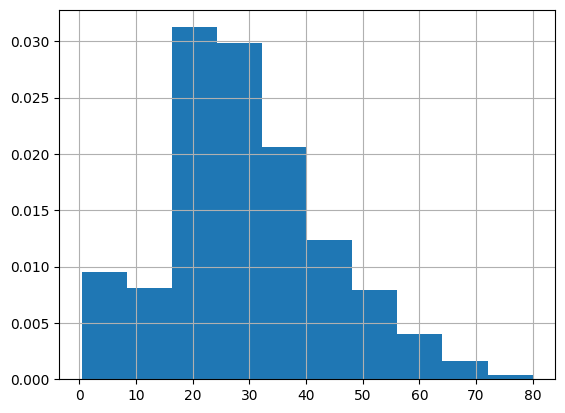

In [94]:
titanic['Age'].hist(density=True)

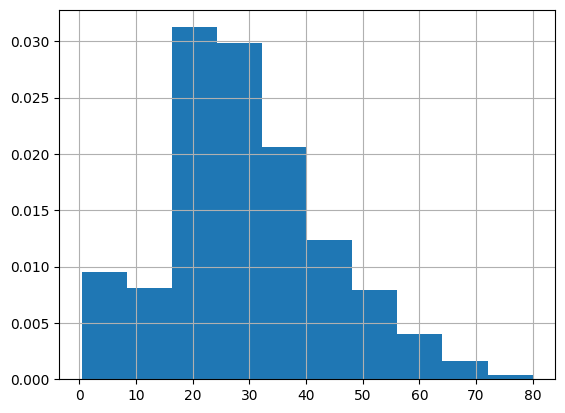

In [95]:
plt.hist(titanic['Age'].dropna().values, density=True)
plt.grid()

Text(0.5, 0, 'Age')

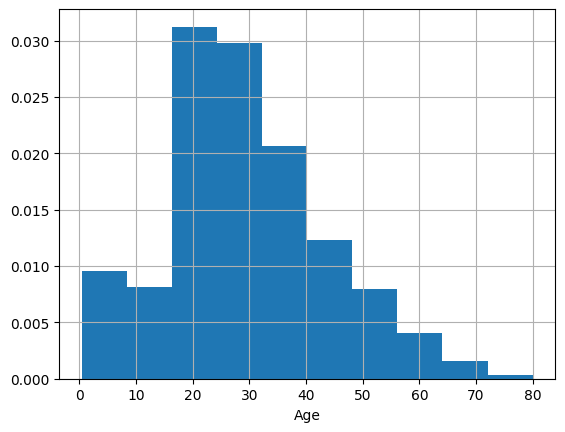

In [96]:
fig, ax = plt.subplots()
titanic['Age'].hist(density=True, ax=ax)
ax.set_xlabel('Age')

In [97]:
titanic['Age_coarse'].value_counts()

Age_coarse
grown-up    592
child       113
senior        7
Name: count, dtype: int64

<Axes: ylabel='count'>

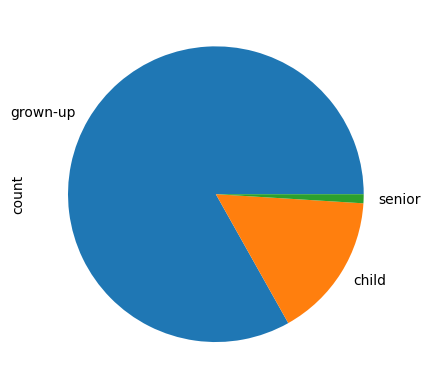

In [98]:
titanic['Age_coarse'].value_counts().plot(kind='pie')

In [99]:
coarse_age_series = titanic['Age_coarse'].cat.add_categories(['unknown'])
coarse_age_series

0      grown-up
1      grown-up
2      grown-up
3      grown-up
4      grown-up
         ...   
884    grown-up
885    grown-up
886         NaN
887    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): ['child' < 'grown-up' < 'senior' < 'unknown']

In [100]:
coarse_age_series.cat.categories

Index(['child', 'grown-up', 'senior', 'unknown'], dtype='object')

In [101]:
coarse_age_series = coarse_age_series.fillna('unknown')
coarse_age_series

0      grown-up
1      grown-up
2      grown-up
3      grown-up
4      grown-up
         ...   
884    grown-up
885    grown-up
886     unknown
887    grown-up
888    grown-up
Name: Age_coarse, Length: 889, dtype: category
Categories (4, object): ['child' < 'grown-up' < 'senior' < 'unknown']

In [102]:
coarse_age_series.value_counts()

Age_coarse
grown-up    592
unknown     177
child       113
senior        7
Name: count, dtype: int64

<Axes: ylabel='count'>

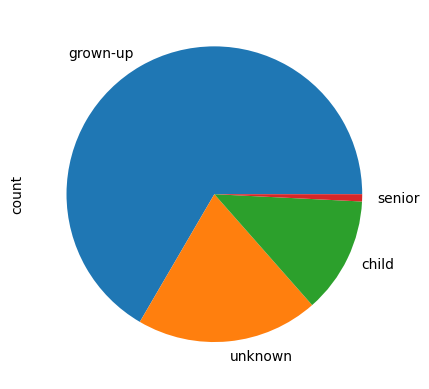

In [103]:
coarse_age_series.value_counts().plot(kind='pie')

<Axes: ylabel='Age_coarse'>

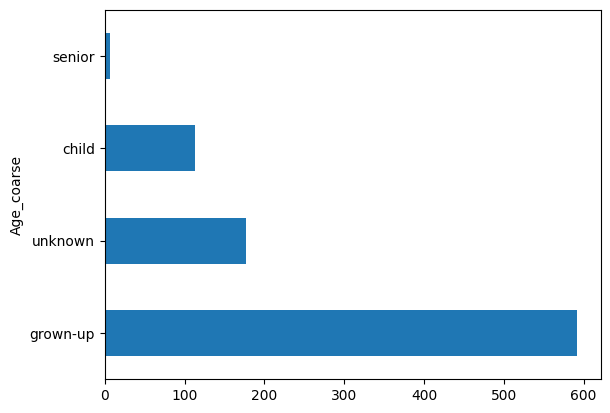

In [104]:
coarse_age_series.value_counts().plot(kind='barh')

The `plot()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) also works with DataFrames.


<Axes: xlabel='Age', ylabel='Fare'>

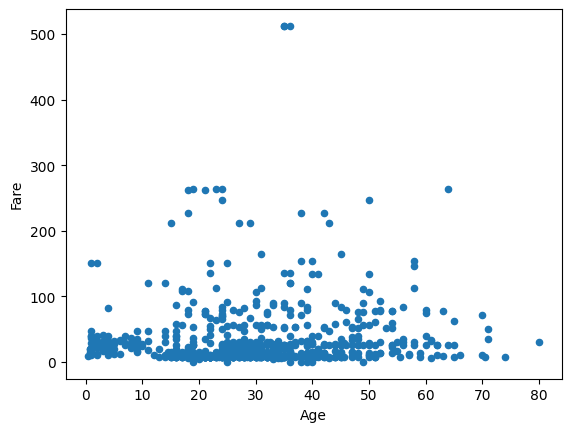

In [105]:
titanic[['Age', 'Fare']].plot(kind='scatter', x='Age', y='Fare')

## Merging DataFrames

Merging is a concept frequently used in relational databases.  
It allows multiple tables to be combined into one by connecting columns based on the values of a specific key column.  
There are different ways this can be achieved.

The `DataFrame.merge` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas-dataframe-merge
) provides these SQL-inspired functionalities:  


In [ ]:
df1 = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [0, np.pi, 2 * np.pi, 3 * np.pi],
    'C': ['mouse', 'cat', 'dog', 'fish']
})
df1

,A,B,C
0,1,0.000000,mouse
1,2,3.141593,cat
2,3,6.283185,dog
3,4,9.424778,fish


In [ ]:
df2 = pd.DataFrame({
    'C': ['mouse', 'horse', 'lizard', 'fish'],
    'D': [1.0, 1.7, 3.0, 2.1],
    'E': [1, np.e, np.e ** 2, np.e ** 3]
})
df2

,C,D,E
0,mouse,1.0,1.000000
1,horse,1.7,2.718282
2,lizard,3.0,7.389056
3,fish,2.1,20.085537


### Inner Join

The inner join takes the intersection of the keys.


In [108]:
df1.merge(df2, how='inner')

,A,B,C,D,E
0,1,0.000000,mouse,1.0,1.000000
1,4,9.424778,fish,2.1,20.085537


### Left Outer Join

The left outer join keeps all values from the left table (the one on which `merge` is called)  
and fills in `NaN` where the corresponding rows are missing in the right table.


In [109]:
df1.merge(df2, how='left')

,A,B,C,D,E
0,1,0.000000,mouse,1.0,1.000000
1,2,3.141593,cat,NaN,NaN
2,3,6.283185,dog,NaN,NaN
3,4,9.424778,fish,2.1,20.085537


### Right Outer Join

The right outer join works the same way as the left outer join,  
but instead of taking all keys from the left table, it takes all keys from the right table.


In [110]:
df1.merge(df2, how='right')

,A,B,C,D,E
0,1.0,0.000000,mouse,1.0,1.000000
1,NaN,NaN,horse,1.7,2.718282
2,NaN,NaN,lizard,3.0,7.389056
3,4.0,9.424778,fish,2.1,20.085537


### Outer Join

The outer join uses all keys that are present in either the left or the right table.  
Missing rows in either table are filled with `NaN`.


In [111]:
df1.merge(df2, how='outer')

,A,B,C,D,E
0,2.0,3.141593,cat,NaN,NaN
1,3.0,6.283185,dog,NaN,NaN
2,4.0,9.424778,fish,2.1,20.085537
3,NaN,NaN,horse,1.7,2.718282
4,NaN,NaN,lizard,3.0,7.389056
5,1.0,0.000000,mouse,1.0,1.000000


### Overlapping Column Names


In [112]:
df2 = df2.rename(columns={'D': 'A'})
df2

,C,A,E
0,mouse,1.0,1.000000
1,horse,1.7,2.718282
2,lizard,3.0,7.389056
3,fish,2.1,20.085537


In [113]:
df1

,A,B,C
0,1,0.000000,mouse
1,2,3.141593,cat
2,3,6.283185,dog
3,4,9.424778,fish


If it’s not implicitly clear which column the join should be performed on, we must tell Pandas which column to use.  
It can also perform the join on multiple columns, but for this the dtypes of the matching columns in both DataFrames must be the same.


In [114]:
df1.merge(df2, how='inner')

/tmp/ipykernel_933/1206675343.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1.merge(df2, how='inner')


,A,B,C,E
0,1,0.0,mouse,1.0


We can explicitly tell Pandas which column to join on using the `on` keyword argument.  
With the `suffixes` parameter, we can control how overlapping column names should be renamed in the merged DataFrame.


In [115]:
df1.merge(df2, how='inner', on='C', suffixes=('_from_df1', '_from_df2'))

,A_from_df1,B,C,A_from_df2,E
0,1,0.000000,mouse,1.0,1.000000
1,4,9.424778,fish,2.1,20.085537


In [116]:
df1['A'] = df1['A'].astype(float)
df1.merge(df2, how='inner', on=['A', 'C'])

,A,B,C,E
0,1.0,0.0,mouse,1.0


---

Lecture: AI I - Basics 

Exercise: [**Exercise 3.5: Preprocessing with Pandas**](../03_data/exercises/05_preprocessing.ipynb)

Next: [**Chapter 3.6: Additional Libraries and Tools**](../03_data/06_additionals.ipynb)